In [1]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage

from src.datasets.utils.ResizeToDivisibleBy32 import ResizeToDivisibleBy32
from src.datasets.INRIAAerialImageLabellingDatasetPatches import (
    INRIAAerialImageLabellingDatasetPatches,
)

import matplotlib.pyplot as plt
import numpy as np

In [2]:
INRIA_PATCHES_DATASET_PATH = "data/INRIAAerialImageLabellingDatasetPatches"

In [3]:
labeled_dataset = INRIAAerialImageLabellingDatasetPatches(
    INRIA_PATCHES_DATASET_PATH,
    split="train",
    transforms=[ResizeToDivisibleBy32()],
)
print(len(labeled_dataset))

18000


In [4]:
test_dataset = INRIAAerialImageLabellingDatasetPatches(
    INRIA_PATCHES_DATASET_PATH,
    split="test",
    transforms=[ResizeToDivisibleBy32()],
)
print(len(test_dataset))

14400


In [5]:
labeled_loader = DataLoader(labeled_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [6]:
for image, mask in labeled_loader:
    print(image.shape)
    print(mask.shape)
    break

torch.Size([1, 3, 512, 512])
torch.Size([1, 1, 512, 512])


In [7]:
print(image.shape)
print(image.dtype)
print(image.unique())

torch.Size([1, 3, 512, 512])
torch.float32
tensor([0.1373, 0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686,
        0.1725, 0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039,
        0.2078, 0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392,
        0.2431, 0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745,
        0.2784, 0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098,
        0.3137, 0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451,
        0.3490, 0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804,
        0.3843, 0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157,
        0.4196, 0.4235, 0.4275, 0.4314, 0.4353, 0.4392, 0.4431, 0.4471, 0.4510,
        0.4549, 0.4588, 0.4627, 0.4667, 0.4706, 0.4745, 0.4784, 0.4824, 0.4863,
        0.4902, 0.4941, 0.4980, 0.5020, 0.5059, 0.5098, 0.5137, 0.5176, 0.5216,
        0.5255, 0.5294, 0.5333, 0.5373, 0.5412, 0.5451, 0.5490, 0.5529, 0.556

In [8]:
print(mask.shape)
print(mask.dtype)
unique, counts = np.unique(mask, return_counts=True)
print(dict(zip(unique, counts)))

torch.Size([1, 1, 512, 512])
torch.uint8
{0: 262144}


In [9]:
to_pil_transform = ToPILImage()
img = to_pil_transform(image.squeeze())

In [10]:
img.save("test-img.png")

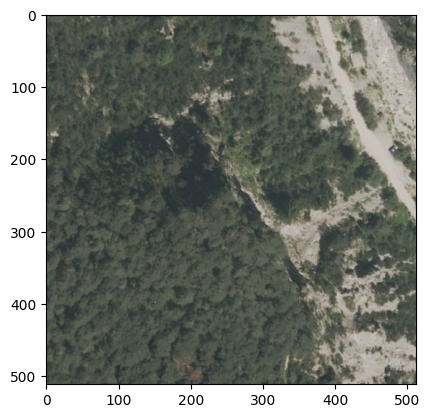

In [11]:
plt.imshow(img)

In [12]:
msk = to_pil_transform(mask.squeeze())

In [13]:
msk.save("test-msk.png")

In [14]:
msk.show()

In [15]:
for image in test_loader:
    print(image.shape)
    break

image
(500, 500)
((23, 255), (30, 255), (22, 255))
torch.Size([1, 3, 512, 512])
